In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [87]:
# Original full data https://www.kaggle.com/wordsforthewise/lending-club 
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

In [88]:
lc_data.dropna(axis=1, inplace=True) # Dropping NANs

In [89]:
lc_data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,...,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,65230,92451797,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,100xx,NY,2.0,Sep-2007,675.0,679.0,1.0,6.0,0.0,204.0,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,10188.98,0.0,2435.82,438.4476,1371.98,...,2.0,1.0,1.0,5951.0,2.0,2.0,133.0,7300.0,1.0,0.0,2.0,3.0,1026.0,0.0,0.0,110.0,6.0,5.0,0.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,1.0,3.0,66.7,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N
1,36521,94187830,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,786xx,TX,0.0,Aug-2008,680.0,684.0,0.0,11.0,0.0,12855.0,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,458.60,0.0,0.00,0.0000,11280.12,...,1.0,0.0,1.0,25831.0,3.0,4.0,3753.0,21700.0,0.0,7.0,0.0,5.0,3869.0,0.0,0.0,99.0,5.0,5.0,0.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,3.0,88.9,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N
2,25712,93882482,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,557xx,MN,0.0,Feb-1999,695.0,699.0,0.0,13.0,0.0,18157.0,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,0.60,0.0,0.00,0.0000,1002.38,...,3.0,1.0,1.0,44715.0,0.0,1.0,5980.0,18300.0,0.0,2.0,0.0,2.0,4836.0,0.0,0.0,213.0,23.0,10.0,0.0,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N
3,92973,91238602,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,224xx,VA,0.0,May-2005,680.0,684.0,0.0,10.0,0.0,6771.0,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,1778.12,0.0,0.00,0.0000,327.33,...,1.0,0.0,0.0,19288.0,2.0,5.0,2300.0,15400.0,1.0,1.0,0.0,5.0,2895.0,0.0,0.0,122.0,4.0,4.0,2.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,2.0,93.5,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N
4,16335,94465406,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,322xx,FL,0.0,Feb-2012,660.0,664.0,1.0,7.0,1.0,2483.0,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,0.0,0.00,0.0000,181.54,...,3.0,0.0,1.0,47856.0,1.0,3.0,236.0,4200.0,0.0,3.0,1.0,4.0,7191.0,0.0,0.0,31.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,1.0,85.7,0.0,0.0,54722.0,50339.0,300.0,50522.0,N


In [90]:
lc_data.shape

(20000, 90)

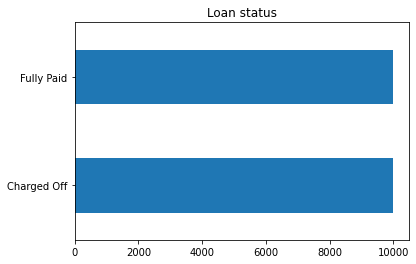

In [91]:
#balanced data
lc_data.loan_status.value_counts().plot(kind='barh', title='Loan status')
plt.show() 

In [92]:
lc_data.loan_status = lc_data.loan_status.replace({'Charged Off':1, 'Fully Paid':0})
y = lc_data.pop('loan_status')

In [93]:
categorical_cols = [
 'term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d']
categorical_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d']

In [94]:
#convert int_rate to numerical
lc_data.int_rate=lc_data.int_rate.str.strip('%')
lc_data.int_rate=pd.to_numeric(lc_data.int_rate, errors='coerce')

In [95]:
numerical_columns = [
  'loan_amnt',
  'installment',
  'delinq_2yrs',
  'fico_range_low',
  'fico_range_high',
  'total_acc',
  'int_rate'
]
numerical_columns

['loan_amnt',
 'installment',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'total_acc',
 'int_rate']

In [96]:
lc_data_subset = lc_data[numerical_columns + categorical_cols]
lc_data_subset.head()

,loan_amnt,installment,delinq_2yrs,fico_range_low,fico_range_high,total_acc,int_rate,term,grade,sub_grade,home_ownership,verification_status,issue_d
0,26450.0,685.99,2.0,675.0,679.0,14.0,18.99,60 months,D,D3,RENT,Not Verified,Nov-2016
1,12000.0,395.37,0.0,680.0,684.0,18.0,11.44,36 months,B,B4,RENT,Source Verified,Nov-2016
2,1000.0,35.16,0.0,695.0,699.0,27.0,15.99,36 months,C,C5,RENT,Source Verified,Dec-2016
3,10000.0,327.34,0.0,680.0,684.0,32.0,10.99,36 months,B,B4,RENT,Verified,Oct-2016
4,4500.0,181.89,0.0,660.0,664.0,7.0,26.24,36 months,E,E5,RENT,Verified,Dec-2016


In [97]:
# Create dummy variables
lc_data_subset = pd.get_dummies(data = lc_data_subset, columns=categorical_cols, drop_first=False)
lc_data_subset

,loan_amnt,installment,delinq_2yrs,fico_range_low,fico_range_high,total_acc,int_rate,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Dec-2016,issue_d_Nov-2016,issue_d_Oct-2016
0,26450.0,685.99,2.0,675.0,679.0,14.0,18.99,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,12000.0,395.37,0.0,680.0,684.0,18.0,11.44,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,1000.0,35.16,0.0,695.0,699.0,27.0,15.99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,10000.0,327.34,0.0,680.0,684.0,32.0,10.99,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,4500.0,181.89,0.0,660.0,664.0,7.0,26.24,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12000.0,369.95,0.0,670.0,674.0,18.0,27.49,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
19996,7300.0,256.62,0.0,675.0,679.0,13.0,15.99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
19997,12600.0,344.36,0.0,685.0,689.0,12.0,21.49,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
19998,16000.0,380.56,0.0,715.0,719.0,29.0,14.99,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [98]:
X = lc_data_subset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            20000 non-null  float64
 1   installment                          20000 non-null  float64
 2   delinq_2yrs                          20000 non-null  float64
 3   fico_range_low                       20000 non-null  float64
 4   fico_range_high                      20000 non-null  float64
 5   total_acc                            20000 non-null  float64
 6   int_rate                             20000 non-null  float64
 7   term_ 36 months                      20000 non-null  uint8  
 8   term_ 60 months                      20000 non-null  uint8  
 9   grade_A                              20000 non-null  uint8  
 10  grade_B                              20000 non-null  uint8  
 11  grade_C                     

# Splitting data

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.33)

In [100]:
print('Train size: {}'.format((X_train.shape[0])))
print('Validation size: {}'.format(X_valid.shape[0]))
print('Test size: {}'.format(X_test.shape[0]))

Train size: 14000
Validation size: 4020
Test size: 1980


In [101]:
X_train.head()

,loan_amnt,installment,delinq_2yrs,fico_range_low,fico_range_high,total_acc,int_rate,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Dec-2016,issue_d_Nov-2016,issue_d_Oct-2016
2518,1650.0,51.40,0.0,735.0,739.0,20.0,7.59,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
12302,12000.0,415.93,0.0,755.0,759.0,16.0,14.99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
9864,12000.0,402.83,0.0,705.0,709.0,28.0,12.74,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
12923,4800.0,162.87,0.0,680.0,684.0,11.0,13.49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
14117,23000.0,596.51,0.0,680.0,684.0,36.0,18.99,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


# Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)

#print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

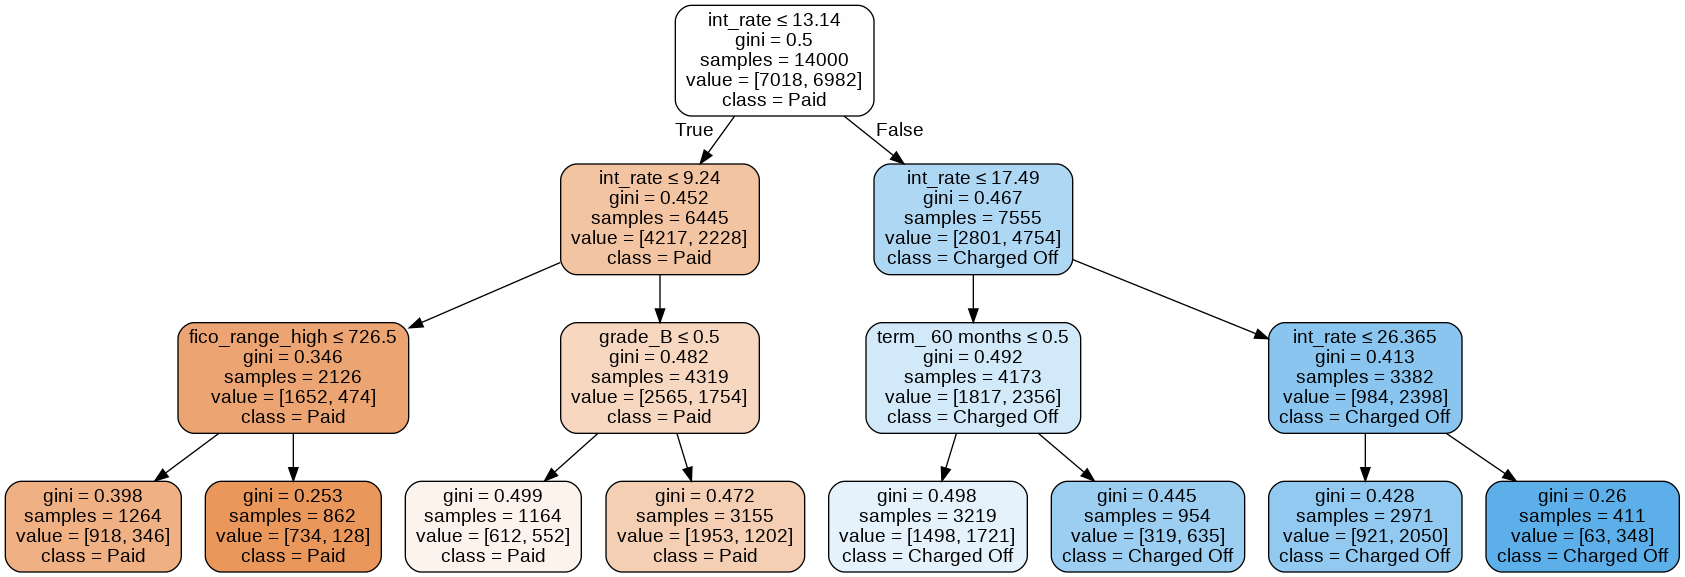

In [103]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Paid', 'Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [104]:
from sklearn.metrics import classification_report
pred_dt_binary = dt_model.predict(X_valid)
print(classification_report(y_valid, pred_dt_binary))

              precision    recall  f1-score   support

           0       0.64      0.59      0.62      2004
           1       0.62      0.67      0.65      2016

    accuracy                           0.63      4020
   macro avg       0.63      0.63      0.63      4020
weighted avg       0.63      0.63      0.63      4020



In [105]:
pd.DataFrame(confusion_matrix(y_valid, pred_dt_binary))

,0,1
0,1188,816
1,665,1351


# Random Forests

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()  
rf_model.fit(X_train, y_train)  
pred_rf = rf_model.predict_proba(X_valid)[:,1]

In [107]:
print(classification_report(y_valid, pred_rf.round(0)))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      2004
           1       0.62      0.61      0.61      2016

    accuracy                           0.61      4020
   macro avg       0.61      0.61      0.61      4020
weighted avg       0.61      0.61      0.61      4020



# XGBoost

In [108]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
pred_xgb =  xgb_model.predict_proba(X_valid)[:, 1]

In [109]:
print(classification_report(y_valid, pred_xgb.round(0)))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64      2004
           1       0.64      0.65      0.64      2016

    accuracy                           0.64      4020
   macro avg       0.64      0.64      0.64      4020
weighted avg       0.64      0.64      0.64      4020



# Evaluating model

In [110]:
def create_roc_plot(name, predictions):
  auc = roc_auc_score(y_valid, predictions).round(2)
  fpr, tpr, _ = roc_curve(y_valid, predictions)

  plt.figure(figsize=(5, 3))
  plt.plot([0, 1], [0, 1], linestyle='--')  # plot horizontal line 
  plt.plot(fpr, tpr, label='{} AUC = {}'.format(name, auc)) # plot the roc curve for the model
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc='lower right')  # show the legend
  plt.show() # show the plot
  return None

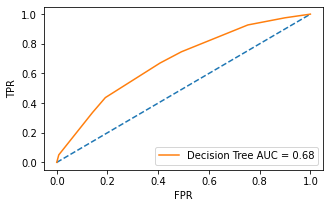

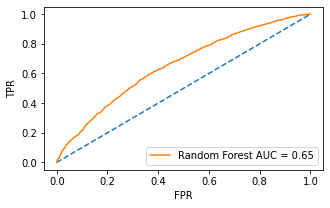

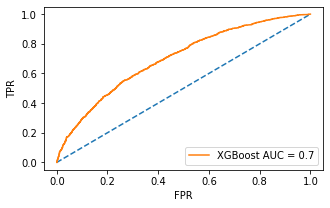

In [111]:
create_roc_plot('Decision Tree', pred_dt)
create_roc_plot('Random Forest', pred_rf)
create_roc_plot('XGBoost', pred_xgb)

# Test Model

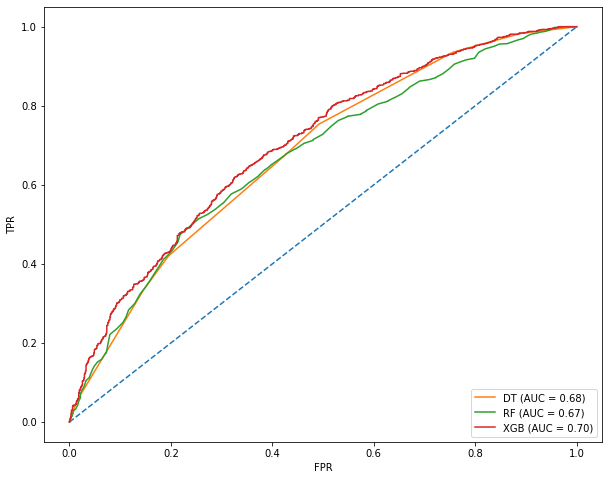

In [112]:
#use test data
pred_dt_test = dt_model.predict_proba(X_test)[:, 1]
pred_rf_test = rf_model.predict_proba(X_test)[:,1]
pred_xgb_test =  xgb_model.predict_proba(X_test)[:, 1]

# calculate scores
auc_dt_test = roc_auc_score(y_test, pred_dt_test)
auc_rf_test = roc_auc_score(y_test, pred_rf_test)
auc_xgb_test = roc_auc_score(y_test, pred_xgb_test)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_dt_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_rf_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_xgb_test)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt_test)
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = %0.2f)' % auc_rf_test)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (AUC = %0.2f)' % auc_xgb_test)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()